In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import cv2 
from PIL import Image
from matplotlib import pyplot as plt 
from tqdm import tqdm

### On essaie de debruiter avec le machine learning

### On importe les fichiers encore une fois

In [5]:
Old_Im=[]
Finals=[]
for i in range(1,10):
    final = np.array(Image.open("data/CALSPAR_init_Mines/crystal_825x300x950_8bits_binary_00"+str(i)+".tiff"))
    start= np.array(Image.open("data/CALSPAR_init_Mines/crystal_825x300x950_8bits_greyscale_00"+str(i)+".tiff"))
    Finals.append(final)
    Old_Im.append(start)
for i in range(10,100):
    final = np.array(Image.open("data/CALSPAR_init_Mines/crystal_825x300x950_8bits_binary_0"+str(i)+".tiff"))
    start= np.array(Image.open("data/CALSPAR_init_Mines/crystal_825x300x950_8bits_greyscale_0"+str(i)+".tiff"))
    Finals.append(final)
    Old_Im.append(start)
for i in tqdm(range(100,951)):
    final = np.array(Image.open("data/CALSPAR_init_Mines/crystal_825x300x950_8bits_binary_"+str(i)+".tiff"))
    start= np.array(Image.open("data/CALSPAR_init_Mines/crystal_825x300x950_8bits_greyscale_"+str(i)+".tiff"))
    Finals.append(final)
    Old_Im.append(start)

100%|██████████| 851/851 [00:34<00:00, 24.54it/s]


### On decoupe chaque image en plusieurs petites images de taille 30x30

In [98]:
X=[]
for k in range(100):
    for i in range(9):
        for j in range(20):
            X.append(Old_Im[k][30*i:30*(i+1),30*j:30*(j+1)])
X=np.array(X)

In [99]:
Y=[]
for k in range(100):
    for i in range(9):
        for j in range(20):
            Y.append(Finals[k][30*i:30*(i+1),30*j:30*(j+1)])
            
Y=np.array(Y)

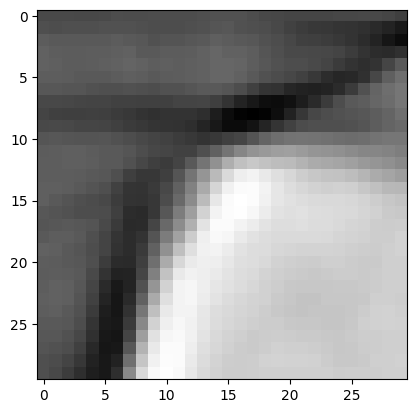

In [100]:
plt.imshow(X[30],cmap='gray')

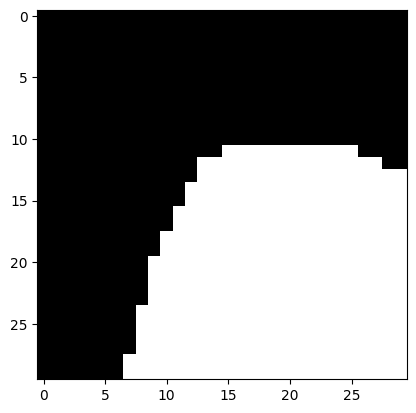

In [101]:
plt.imshow(Y[30],cmap='gray')

##### un algorithme de reconstruction d'image

In [102]:
l=[]
for k in range(100):
    l.append(np.concatenate(Y[20*k:20*(k+1)],axis=1))
r=np.concatenate(l[:9],axis=0)

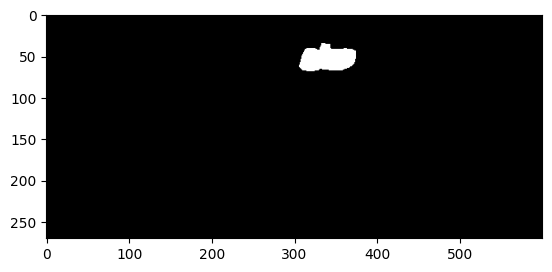

In [103]:
plt.imshow(r,cmap='gray')

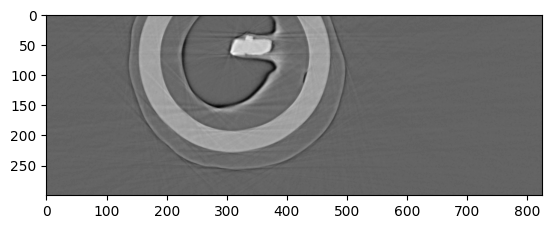

In [104]:
plt.imshow(Old_Im[0],cmap='gray')

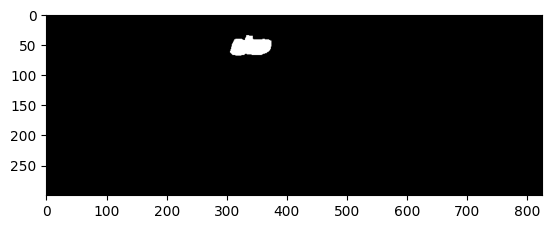

In [105]:
plt.imshow(Finals[0],cmap='gray')

### on prepare les donnes pour le mahine learning

In [106]:
data=[]
y=[]
for i in tqdm(range(100)):
    data.append(X[i].ravel())
    y.append(Y[i].ravel())

100%|██████████| 100/100 [00:00<?, ?it/s]


In [108]:
tor_data=torch.tensor(data,dtype=torch.float32)/255
tor_y=torch.tensor(y,dtype=torch.float32)

In [149]:
n_input,n_hidden,n_out=900,900,900
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid()
                      )
batch_size, learning_rate =900,0.01
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [151]:
losses = []
for epoch in tqdm(range(10000)):
    pred_y = model(tor_data)
    loss = loss_function(pred_y, tor_y)
    losses.append(loss.item())
    
    model.zero_grad()
    loss.backward()

    optimizer.step()

100%|██████████| 10000/10000 [06:32<00:00, 25.49it/s]


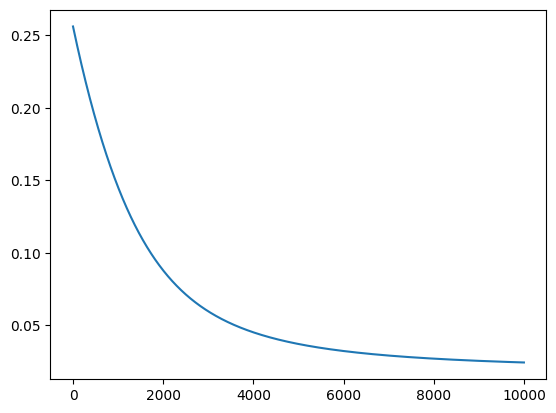

In [156]:
plt.plot(losses)

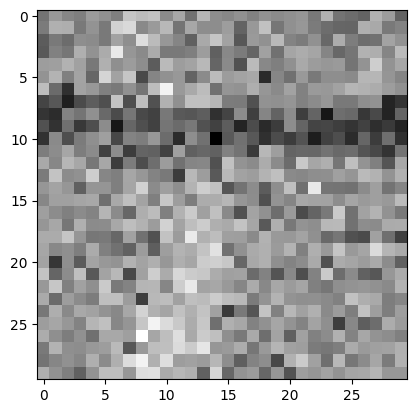

In [157]:
pred=(model(tor_data[0])).detach().cpu().numpy()
pred=pred.reshape((30,30))
plt.imshow(pred,cmap='gray')

### il faut remarquer ici qu'on demande a la machine de debruiter et segmenter en meme temps, ce qui n'est pas chose aisee. L'image obtenue est tres bruite, un reseau de neurone plus vaste pourrait donner de meilleurs resultats, mais vu la complexite necessitrait des ordinateurs tres puissants, et prendrait beaucoup trop de temps par image.

In [158]:
l=[]
for i in range(5):
    r=[]
    for j in range(20):
        r.append(model(tor_data[i*20+j]).detach().cpu().numpy().reshape((30,30)))
    l.append(np.concatenate(r,axis=1))
c=np.concatenate(l,axis=0)

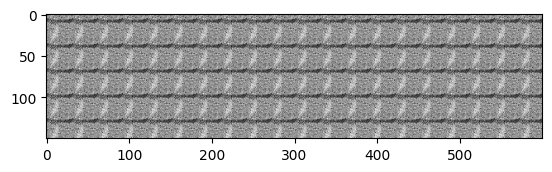

In [159]:
plt.imshow(c,cmap='gray')